> **Data Preparation - Data Transformation (make it readable to the model - numbers)**
>
> **Feature Selection - Choose the best features (making your model simpler and efficient)**
>
> **Machine Learning Algorithm - Learning to Predict labels according to some features**

## Agenda
    0.0 Data Preparation/Transformation
        0.1 Normalization
        0.2 Rescaling
            0.2.1. Min-Max Scaler
            0.2.2. RobustScaler
        0.3 Feature Encoding
        0.4 Response Variable Transformation
        0.5 Nature Transformation 
            (dealing with datetime)
    1.0 Feature Selection
        1.1 Training Test Split
        1.2 Feature Selector
    2.0 Machine Learning Modelling
        2.1 Cross Validation
    3.0 Hyperparameter Fine Tuning
    4.0 Final Model
        4.1 Saving Model
    5.0 Error interpretation    
        5.1 Business Performance
        5.2 Error Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

import pickle

## Helper Functions 

In [13]:
def train_test_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return y_pred
    
def mean_percentage_error( y_values, predictions ):
    y_values = np.array(y_values)
    predictions = np.array(predictions)
    return np.mean( ( y_values - predictions ) / y_values )

## 0.0 Data Preparation

In [2]:
raw_data = pd.read_csv("churn.csv")
raw_data.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2926,2927,15744529,Chiekwugo,510,France,Male,63,8,0.0,2,1,1,115291.86,0


In [3]:
data = raw_data.copy()

**Delete Unnecessary Features** as ID, Name, etc...

In [ ]:
cols_to_drop = ['column','column']
data.drop(columns=cols_to_drop, inplace=True)

### 0.1 Normalization

It works for gaussian distribution data.
    
[Tests for a Normal Distribution](https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93)

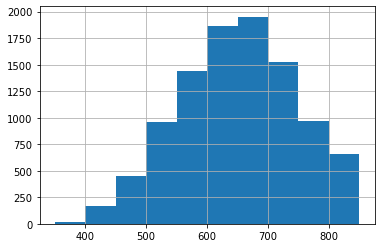

In [4]:
data['CreditScore'].hist();

In [5]:
data['CreditScore'] = normalize(data[['CreditScore']].values, axis=0)

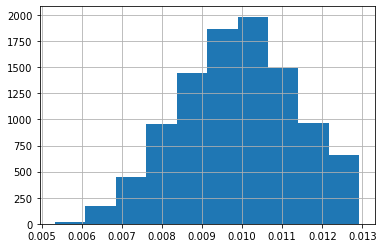

In [6]:
# rescaled range
data['CreditScore'].hist();

### 0.2 Rescaling

Use it with non gaussian distribution data. 
    
    Use boxplot to look for outliers.
    
    Min-Max Scaler (if no outlier)
    RobustScaler (deals with outlier)

**0.2.1. Min-Max Scaler**

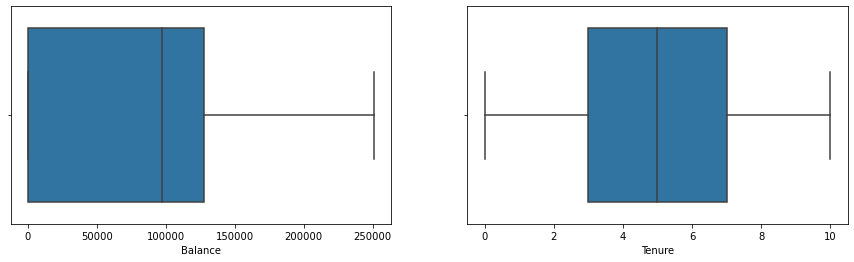

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(data['Balance']);
plt.subplot(1,2,2)
sns.boxplot(data['Tenure']);

In [31]:
min_max_scaler = MinMaxScaler()
data['column_name'] = min_max_scaler.fit_transform(data[['column_name']].values)

**0.2.2. RobustScaler**

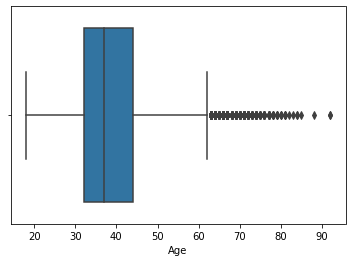

In [132]:
sns.boxplot(data['column_name']);

In [25]:
robust_scaler = RobustScaler()
data['column_name'] = robust_scaler.fit_transform(data[['column_name']].values)

### 0.3 Feature Encoding

[all about categorical variable encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


1) One Hot Encoding <br>
2) Label Encoding <br>
3) Ordinal Encoding <br>
4) Helmert Encoding <br>
5) Binary Encoding <br>
6) Frequency Encoding <br>
7) Mean Encoding <br>
8) Weight of Evidence Encoding <br>
9) Probability Ratio Encoding <br>
10) Hashing Encoding <br>
11) Backward Difference Encoding <br>
12) Leave One Out Encoding <br>
13) James-Stein Encoding <br>
14) M-estimator Encoding <br>

In [ ]:
# Explicit Encoding
codes = {'attribute_1':0, 'attribute_2':1, 'attribute_3':2}
data['column_name'] = data['column_name'].map( codes )

# One Hot Encoding
data = pd.get_dummies( data, prefix=['column_name'], columns=['column_name'] )

# One of the 14+ ways to encode a feature (study to know the right situation to use them)
label_encoder = LabelEncoder()
data['column_name'] = label_encoder.fit_transform( data['column_name'] )

### 0.4 Response Variable Transformation

    If needed (regression problems)

In [ ]:
data['continuos_variable'] = np.log1p( data['continuos_variable'] )

In [ ]:
# Use    np.expm1( data['continuos_variable'] )    to bring it back later

### 0.5 Nature Transformation

    It's good to deal with cyclical data, such as time... 24 hours, 7 days, 12 months...
        (note that year is not cyclical, it only grows more and more)

In [ ]:
# day of week
data['day_of_week_sin'] = data['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
data['day_of_week_cos'] = data['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# month
data['month_sin'] = data['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
data['month_cos'] = data['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day 
data['day_sin'] = data['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
data['day_cos'] = data['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# week of year
data['week_of_year_sin'] = data['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
data['week_of_year_cos'] = data['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )

## 1.0 Feature Selection

> Search for: **_Filter Methods - Embedded Methods - Wrapper Methods_**

> Algorithms with **_feature_importances__** or **_coef__**: <br>
> **_Random Forest, Lasso Regression, Ridge Regression_** 

> **_Boruta, SHAP_**


In [7]:
data_frame = data.copy()

### 1.1Training Test Split

ps: for time series the approach is different (look for it if you're working with time series).

In [ ]:
X = df.drop(columns=['response_variable_y_label'])
y = df['response_variable_y_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.2 Feature Selector (Boruta)

[Boruta](https://github.com/scikit-learn-contrib/boruta_py)

In [ ]:
model = RandomForestClassifier(n_jobs=-1)

X_train_n, y_train_n = X_train.to_numpy(), y_train.to_numpy()

In [ ]:
boruta = BorutaPy(  model, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

In [ ]:
columns_selected = boruta.support_#.tolist()

cols_selected_boruta = X_train.iloc[:, columns_selected].columns.to_list()
cols_selected_boruta

In [ ]:
cols_not_selected_boruta = list( np.setdiff1d( X_train.columns, cols_selected_boruta ) )
cols_not_selected_boruta

**The final choice is yours, as [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) is a cyclical process you can try Boruta's selection first and change it later.**

## 2.0 Machine Learning Modelling

In [ ]:
boruta_X_train = X_train[cols_selected_boruta]
boruta_X_test = X_test[cols_selected_boruta]

In [ ]:
predictions = train_test_model(model, boruta_X_train, boruta_X_test, y_train, y_test)

**Without Boruta' Selection - All Features (Compare It)**

In [ ]:
predictions = train_test_model(model, X_train, X_test, y_train, y_test)

### 2.1 Cross Validation

[cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) <br>
[scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

[Time Series Cross Validation](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4) works differently <br>
[otexts.com](https://otexts.com/fpp3/tscv.html)

In [ ]:
cross_val_score(random_forest_model, X, y, cv=5, scoring='f1_macro')

## 3.0 Hyperparameter Fine Tuning

**[Random Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)** Fast, but _random_ (it might repeat a parameter set of parameters in an iteration, wasting time. And it might not find the real best parameters).

**[Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)** Slow, but efficient (it tries every possible combination).

**[Bayesian Search](https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a)** ([hyperopt](http://hyperopt.github.io/hyperopt/), [SMAC](https://automl.github.io/SMAC3/master/))

## 4.0 Final Model

According to the best parameters.

In [ ]:
parameters = {
    'parameter_1':value_1,
    'parameter_2':value_2,
    'parameter_3':value_3,
}
model = RandomForest(parameters)

In [ ]:
predictions = train_test_model(model, boruta_X_train, boruta_X_test, y_train, y_test):

### 4.1 Saving Model

In [ ]:
with open('model_name.pkl','wb') as file:
    pickle.dump(model, file)

## 5.0 Error interpretation 

> observation: for [classification problems](https://scikit-learn.org/stable/modules/model_evaluation.html) the mindset is similar, but of course, the evaluation method is different.

### For Regression Problems

> **MAE** and **MAPE - _Good for business report_.**
>
> **RMSE - _Good for trying to improve model's performance_.**


**MAE - [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)**

- It assigns equal weights for all errors.
- It's robust against outliers.
- **_Easy understanding for business team._**

**MAPE - [Mean Absolute Percentage Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)**

- **It is widely used in the dissemination of results.**
- _(%) It's also good for the business team to understand._
- The Response Variable can Not assume 0 as a value.
    - **We can't use MAPE if We are trying to predict the value 0.**

<br>

        "On average, our error is about MAE_VALUE (up or down). As the mean value of RESPONSE_VARIABLE is about
        DF['RESPONSE_VARIABLE'].MEAN(), that's a MAE_VALUE / DF['RESPONSE_VARIABLE'].MEAN() percent error."
        
        "On average, our predictions are MAPE_VALUE percent above or below the real value."

<br>    

**MSE - [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)**<br>
**RMSE - [Root Mean Squared Error](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)**

- It assigns greater weight to larger errors (outliers are more visible/detectable).
    - **In order to improve the model performance we can take in consideration the RMSE, since outliers are a big problem and<br>
    RMSE detects them.**
    
    
**MPE - Mean Percentage Error**

- It's not used to evaluate model's performance.
- It's used to know if the model is overestimating or underestimating.
    - _For example, in a sales prediction problem if the model overestimates, the company will have more products on store than necessary. <br>
    On the other hand, underestimating means that the company will not have bought enough products to sell (it's going to lose money <br>
    from sales that will not happen, but could have happened). Depending on business situation,  you might prefer one above the other._
- **You can use it belatedly with the final model.** As well as NP.MEAN(PREDICTIONS) 


### 5.1 Business Performance 

- **Based on the chosen metric, how much revenue does the model return?**
    - _If there is some kind of category (stores, cities, regions...) you can also calculate this for each one of them._
    
    
        Store            Category (Brazil's store, USA's store...)
        
        Prediction       Estimated Sales Revenue
        Worst Scenario   Estimated Sales Revenue - MAE
        Best Scenario    Estimated Sales Revenue + MAE
        
        MAE              "On average, our error is about MAE_VALUE (up or down)"
        MAPE             "On average, our predictions are MAPE_VALUE percent above or below the real value."
        
_If MAPE is low, you can expect the model to be right and presuppose the Best Scenario to happen. Otherwise, go with the worst one. That decision also depends on MPE (if it's too positive, yeah! Best scenario)._

In [ ]:
['store'] ['prediction'] ['worst_scenario'] ['best_scenario'] ['MAE'] ['MAPE']

### 5.2 Error Graphs 

**Imagine a sales forecast project.**

In [ ]:
data['error'] = data['sales'] - data['predictions']
data['percentage_error'] = data['predictions'] / data['sales'] 

**data['percentage_error'] equals 1 means the model nailed it. Greater than 1 means the model has overestimated, else, it has underestimated.**

In [ ]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='sales', data=data, label='SALES' )
sns.lineplot( x='date', y='predictions', data=data, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='percentage_error', data=data )
plt.axhline( 1, linestyle='--')

plt.subplot( 2, 2, 3 )
sns.distplot( data['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( data['predictions'], data['error'] )

### The output should be something like this:

The last two graphs are related to Residuals Analysis. Search about it.

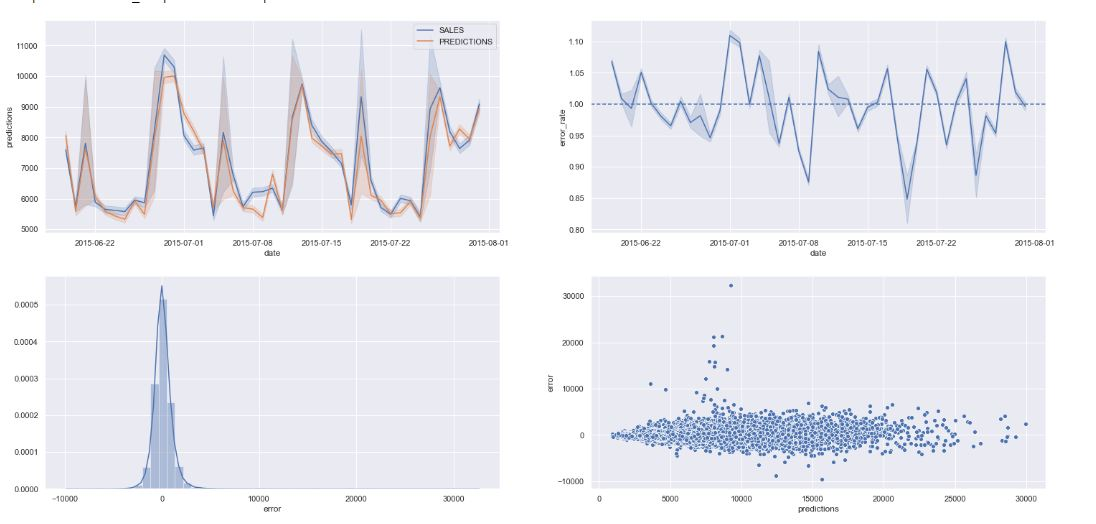

In [3]:
from IPython.display import Image
Image("error_evaluation.JPG")

**The model is finally ready to be deployed (or if it's not), since [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining#) is a cyclical process you can do it all over again, making some major changes trying to get better results.**